In [1]:
#conda install matplotlib

1058
1058


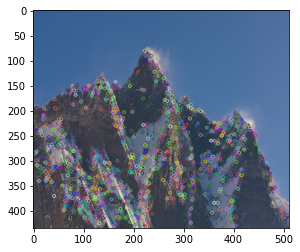

In [2]:
#Task 1 Part 1
import cv2
import math
import numpy as np
import sys
from matplotlib import pyplot as plt

class SiftDetector():
    def __init__(self, norm="L2", params=None):
        self.detector=self.get_detector(params)
        self.norm=norm

    def get_detector(self, params):
        if params is None:
            params={}
            params["n_features"]=0
            params["n_octave_layers"]=3
            params["contrast_threshold"]=0.04
            params["edge_threshold"]=10
            params["sigma"]=1.6

        detector = cv2.xfeatures2d.SIFT_create(
                nfeatures=params["n_features"],
                nOctaveLayers=params["n_octave_layers"],
                contrastThreshold=params["contrast_threshold"],
                edgeThreshold=params["edge_threshold"],
                sigma=params["sigma"])

        return detector



if __name__ == '__main__':
    # 1. Read image
    img = cv2.imread('image1.jpg')
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    # 2. Convert image to grayscale
    gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    plt.imshow(img,cmap='gray')
    # 3. Initialize SIFT detector
    SFD = SiftDetector(params = None)
    # 4. Detect SIFT features
    #key_point = SFD.detector.detect(gray_img,None)
    key_points, features = SFD.detector.detectAndCompute(gray_img, None)
    cv2.drawKeypoints(img,key_points,img)
    # 5. Visualize detected features
    plt.imshow(img)
    # Print number of SIFT features detected
    #The number of features detected is printed
    print(len(features))
    print(len(key_points))

282
282


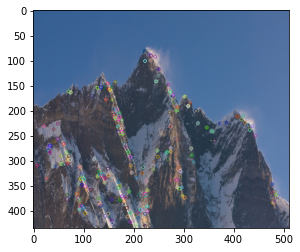

In [3]:
#Task 1 Part 2
import cv2
import math
import numpy as np
import sys
from matplotlib import pyplot as plt

class SiftDetector():
    def __init__(self, norm="L2", params=None):
        self.detector=self.get_detector(params)
        self.norm=norm
    #Changing the parameters as mentioned in Task 1
    def get_detector(self, params):
        if params is None:
            params={}
            params["n_features"]=0
            params["n_octave_layers"]=3
            params["contrast_threshold"]=0.08 #------> changing the contrast_threshold values
            params["edge_threshold"]=10
            params["sigma"]=1.6

        detector = cv2.xfeatures2d.SIFT_create(
                nfeatures=params["n_features"],
                nOctaveLayers=params["n_octave_layers"],
                contrastThreshold=params["contrast_threshold"],
                edgeThreshold=params["edge_threshold"],
                sigma=params["sigma"])

        return detector



if __name__ == '__main__':
    # 1. Read image
    img = cv2.imread('image1.jpg')
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    # 2. Convert image to grayscale
    gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    plt.imshow(img,cmap='gray')
    # 3. Initialize SIFT detector
    SFD = SiftDetector(params = None)
    # 4. Detect SIFT features
    #key_point = SFD.detector.detect(gray_img,None)
    key_points, features = SFD.detector.detectAndCompute(gray_img, None)
    cv2.drawKeypoints(img,key_points,img)
    # 5. Visualize detected features
    plt.imshow(img,cmap='gray')
    # Print number of SIFT features detected
    #The number of features detected is printed
    print(len(features))
    print(len(key_points))

(585, 390)
(644, 429)


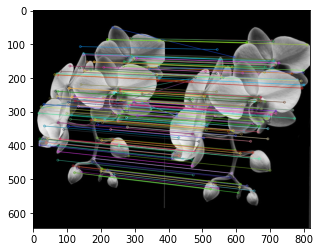

In [4]:
#Task 2
import cv2
import math
import numpy as np
import sys
from matplotlib import pyplot as plt

class SiftDetector():
    def __init__(self, norm="L2", params=None):
        self.detector=self.get_detector(params)
        self.norm=norm

    def get_detector(self, params):
        if params is None:
            params={}
            params["n_features"]=0
            params["n_octave_layers"]=3
            params["contrast_threshold"]=0.08 # ----------> reduced features
            params["edge_threshold"]=10
            params["sigma"]=1.6

        detector = cv2.xfeatures2d.SIFT_create(
                nfeatures=params["n_features"],
                nOctaveLayers=params["n_octave_layers"],
                contrastThreshold=params["contrast_threshold"],
                edgeThreshold=params["edge_threshold"],
                sigma=params["sigma"])

        return detector

# Rotate an image
#
# image: image to rotate
# x:     x-coordinate of point we wish to rotate around
# y:     y-coordinate of point we wish to rotate around
# angle: degrees to rotate image by
#
# Returns a rotated copy of the original image
def rotate(image, x, y, angle):
    pass


# Get coordinates of center point.
#
# image:  Image that will be rotated
# return: (x, y) coordinates of point at center of image
def get_img_center(image):
    pass


if __name__ == '__main__':
    # Read image with OpenCV and convert to grayscale
    img = cv2.imread('image2.jpg')
    gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    plt.imshow(gray_img,cmap='gray')
    
    # Initialize SIFT detector
    SFD = SiftDetector(params = None)

    # Store SIFT keypoints of original image in a Numpy array
    kp1, features1 = SFD.detector.detectAndCompute(gray_img, None)

    # center of image points. 'img_center' is in (Y, X) order. #(Skip this step for Task2)
    

    # Degrees with which to rotate image. #(Skip this step for Task2)


    # Rotate image #(For Task2 , rescale the image)
    print(gray_img.shape)
    rescaled_image = cv2.resize(gray_img,None,fx=1.1,fy=1.1)
    plt.imshow(rescaled_image,cmap='gray')
    print(rescaled_image.shape)
    
    # Compute SIFT features for rotated image #( For task2, rescaled image)
    kp2, features2 = SFD.detector.detectAndCompute(rescaled_image, None)
        
    # BFMatcher with default params
    BFMacther = cv2.BFMatcher()
    
    # Apply ratio test
    #Iterating through match points and storing the ones whose distance is less than 0.75
    #Values are stored in good_matches
    matches = BFMacther.knnMatch(features1,features2,k=2)
    good_matches = []
    for match1,match2 in matches:
        if match1.distance < 0.75 * match2.distance:
            good_matches.append([match1])
            
    # cv2.drawMatchesKnn to draw matches
    sift_matches = cv2.drawMatchesKnn(gray_img,kp1,rescaled_image,kp2,good_matches,None,flags=2)
    plt.imshow(sift_matches,cmap='gray')

In [5]:
#cv2.imwrite('Lab2Task2.jpg',sift_matches)

True

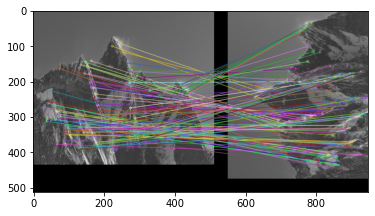

In [6]:
#Task 3
import cv2
import math
import numpy as np
import sys
from matplotlib import pyplot as plt

class SiftDetector():
    def __init__(self, norm="L2", params=None):
        self.detector=self.get_detector(params)
        self.norm=norm

    def get_detector(self, params):
        if params is None:
            params={}
            params["n_features"]=0
            params["n_octave_layers"]=3
            params["contrast_threshold"]=0.08 # ----------> reduced features
            params["edge_threshold"]=10
            params["sigma"]=1.6

        detector = cv2.xfeatures2d.SIFT_create(
                nfeatures=params["n_features"],
                nOctaveLayers=params["n_octave_layers"],
                contrastThreshold=params["contrast_threshold"],
                edgeThreshold=params["edge_threshold"],
                sigma=params["sigma"])

        return detector

# Rotate an image
#
# image: image to rotate
# x:     x-coordinate of point we wish to rotate around
# y:     y-coordinate of point we wish to rotate around
# angle: degrees to rotate image by
#
# Returns a rotated copy of the original image
def rotate(image, x, y, angle):
    scale = 1.0
    h = image.shape[0]
    w = image.shape[1]
    matrix = cv2.getRotationMatrix2D(center, angle, scale)
    rotated_image = cv2.warpAffine(image, matrix, (h, w))
    return rotated_image
    
# Get coordinates of center point.
#
# image:  Image that will be rotated
# return: (x, y) coordinates of point at center of image
def get_img_center(image):
    height = image.shape[0]
    width = image.shape[1]
    center = (width/2,height/2)
    return center


if __name__ == '__main__':
    # Read image with OpenCV and convert to grayscale
    img = cv2.imread('image1.jpg')
    gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    plt.imshow(gray_img,cmap='gray')
    
    # Initialize SIFT detector
    SFD = SiftDetector(params = None)

    # Store SIFT keypoints of original image in a Numpy array
    kp1, features1 = SFD.detector.detectAndCompute(gray_img, None)

    # center of image points. 'img_center' is in (Y, X) order. #(Skip this step for Task2)
    center = get_img_center(gray_img)
    x,y = center[0],center[1]

    # Degrees with which to rotate image. #(Skip this step for Task2)
    angle = 90

    # Rotate image #(For Task2 , rescale the image)
    rotated_image = rotate(gray_img,x,y,angle)
    plt.imshow(rotated_image,cmap='gray')
    
    # Compute SIFT features for rotated image #( For task2, rescaled image)
    kp2, features2 = SFD.detector.detectAndCompute(rotated_image, None)
        
    # BFMatcher with default params
    BFMacther = cv2.BFMatcher() #inbuilt function
    
    # Apply ratio test
    matches = BFMacther.knnMatch(features1,features2,k=2)
    #Iterating through match points and storing the ones whose distance is less than 0.75
    #Values are stored in good_matches
    good_matches = []
    for match1,match2 in matches:
        if match1.distance < 0.75 * match2.distance:
            good_matches.append([match1])
            
    # cv2.drawMatchesKnn to draw matches
    sift_matches_2 = cv2.drawMatchesKnn(gray_img,kp1,rotated_image,kp2,good_matches,None,flags=2)
    plt.imshow(sift_matches_2,cmap='gray')

In [7]:
#cv2.imwrite('Lab2Task3.jpg',sift_matches_2)

True